In [1]:
# 必要なライブラリを読込
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# versicolorとversinicaの二値分類をする
from sklearn.datasets import load_iris
iris = load_iris()
X_1 = iris.data[50:, [0, 2]]
y_1 = iris.target[50:]

# データセットの分割
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

# 線形SVCの学習
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear', C=1.0)
svc_1.fit(X_1_train, y_1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 陽性、陰性などについてはsklearnのmetricsでやる。

In [4]:
# 混合行列のarrayを作成
# (正解ラベル, 予測ラベル)
from sklearn.metrics import confusion_matrix # 真陽性、偽陽性、真陰性、偽陰性
cm_1 = confusion_matrix(y_1_test, svc_1.predict(X_1_test))
cm_1

array([[13,  2],
       [ 1, 14]])

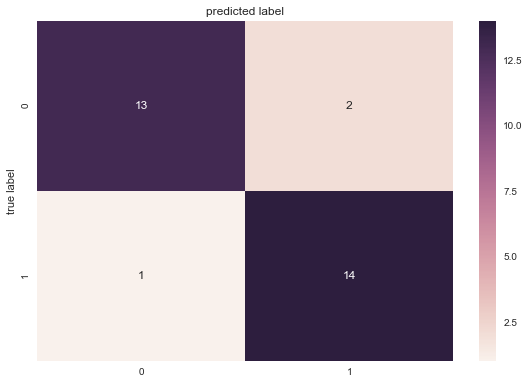

In [8]:
import seaborn as sns
sns.heatmap(cm_1, annot=True,fmt="d")
plt.title('predicted label')
plt.ylabel('true label')
plt.tight_layout() # ラベルが重ならないように自動調整
plt.show()

In [10]:
from sklearn import metrics
metrics.accuracy_score(y_1_test, svc_1.predict(X_1_test))

0.90000000000000002

In [11]:
# 再現率(recall)= 陽性であるサンプルをいかに見抜けたか TP/(TP + FP)
from sklearn import metrics
metrics.recall_score(y_1_test, svc_1.predict(X_1_test))

0.8666666666666667

In [12]:
# 適合率(precision)= モデルによる陽性判定がどれだけ信用できるか TP/(TP + FN)
# 検索エンジンによるWebページの選別
# TPが少なくても気づかないが、FNが多いとユーザはイラつく
metrics.precision_score(y_1_test, svc_1.predict(X_1_test))

0.9285714285714286

In [13]:
# f値 再現率と適合率の調和平均
# どちらもそれなりに良くないとだめ
metrics.f1_score(y_1_test, svc_1.predict(X_1_test))

0.89655172413793105

### 多クラスの場合の指標の見方

In [14]:
# 3クラス分類を実行する
iris = load_iris()
X_2 = iris.data[:, [0, 2]]
y_2 = iris.target

# データセットの分割
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

# 線形SVCの学習
from sklearn.svm import SVC
svc_2 = SVC(kernel='linear', C=1.0)
svc_2.fit(X_2_train, y_2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_2_test,svc_2.predict(X_2_test))

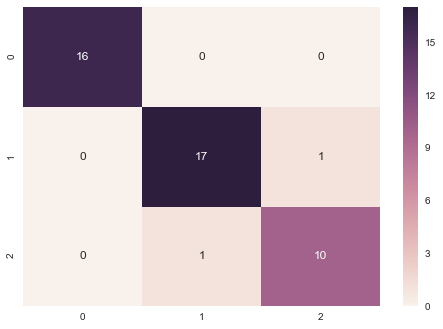

In [17]:
sns.heatmap(cm2,annot=True)
plt.show()

サンプル数の偏りを考慮しない**ミクロ平均**<br>
考慮する**マクロ平均**

In [18]:
metrics.precision_score(y_2_test, svc_2.predict(X_2_test), average='macro')

0.95117845117845112

In [20]:
metrics.precision_score(y_2_test, svc_2.predict(X_2_test),average='micro')

0.9555555555555556

### Cross-Validationについて

In [21]:
# データセットの読み込み
from sklearn.datasets import load_boston
boston = load_boston()

# DataFrameを生成
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_target = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([df_data, df_target], axis=1)

# 変数を格納
# 説明変数: LSTAT, RM
X_3 = df.loc[:, ['LSTAT', 'RM']].values
y_3 = df.loc[:, ['MEDV']].values
# 線形回帰のインスタンスを生成
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
from sklearn.model_selection import KFold
kf_3 = KFold(n_splits=5, shuffle=True, random_state=0)

In [23]:
from sklearn.model_selection import cross_val_score
score3 = cross_val_score(lr,X_3, y_3, cv=kf_3)
score3

array([ 0.54090848,  0.70922084,  0.57458547,  0.55307476,  0.738459  ])

In [24]:
score3.mean()

0.62324971110773009

In [25]:
score3.std()

0.083351095185182217

### グリッドサーチ

In [27]:
# XORのデータの作成
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
# # データのプロット
# plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
# plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
# plt.xlim([-3, 3])
# plt.ylim([-3, 3])
# plt.legend(loc='best') # 右上に凡例を出力
# plt.show()

In [28]:
# ホールド・アウト法による分割
X_xor_train, X_xor_test, y_xor_train, y_xor_test = train_test_split(X_xor, y_xor, test_size=0.3, random_state=0)

In [29]:
# 調整したいパラメータを指定
param_grid = {'C': [0.1, 1.0, 10, 100, 1000, 10000],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}
# データの分割方法を指定（層化）
from sklearn.model_selection import StratifiedKFold
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
gs_svc = GridSearchCV(SVC(), param_grid, cv=kf_5) # 学習済みモデルとして振る舞う

In [32]:
# GridSearchCVを利用した学習
# 最適なパラメータを自動で採用した分類器となる
gs_svc.fit(X_xor_train, y_xor_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 10, 100, 1000, 10000], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [34]:
gs_svc.best_params_ #最良の組み合わせを出力

{'C': 1000, 'gamma': 0.1}

In [35]:
# そのときのtest精度の平均を出力
gs_svc.best_score_

0.97142857142857142

## 欠損値処理

ダミー変数作ったら他のやつとconcatして用いる。

分類問題の場合は､クラスラベルもエンコーディングをする必要があります｡

クラスラベルの場合は､たとえ順序関係がなくても順序特徴量と同じマッピングを適用しても不都合がありません？ イマイチわからず
> deepでもone-hotで使うはずだけど。。。

In [ ]:
pd.get_dummies(df['COLOR'])